# Addison Task

Our assignment was to look at the csv and/or xls files provided by the Addison and explore data analysis with it. 

For this particular assignment, we decided to focus on the Credit Line column in the csv file. More specifically, our question was: What are the ways in which the Addison gets their artwork, and which ways are the most common?

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('AGAA_ObjectData.csv')
df_new = df.dropna(subset=['Credit Line'])
df_new

,Accession Number,Artist - Sort Name,Full Title,Portfolio (Series) Title,Creation Date,Height,Width,Depth,Media & Support,Credit Line,Class Type
0,2003.23,"A, Type",Stand (face),NaN,2002-2003,24 in.,30 in.,NaN,two-channel video installation,purchased with funds from an anonymous donor a...,G: Photography
1,2007.36,"A, Type",Cheer (Slam),NaN,2006,18 1/2 in.,29 1/2 in.,NaN,chromogenic print,gift of the artists,G: Photography
2,2007.37,"A, Type",Cheer,NaN,2006,NaN,NaN,NaN,single-channel video,gift of the artists,G: Photography
3,1948.11,"Abate, Peter",Wandering,NaN,c. 1947,1 3/4 in.,5 1/8 in.,NaN,bronze,museum purchase,B: Sculpture
4,1937.37,"Abbey, Edwin Austin",Deck of a Ship,NaN,n.d.,15 in.,10 11/16 in.,NaN,"graphite, ink wash on wove paper",museum purchase,E: Work on Paper
...,...,...,...,...,...,...,...,...,...,...,...
18008,1994.11,"Zucker, Joe",Arrow,NaN,1989,41 in.,25 in.,NaN,acrylic on canvas,gift of Richard D. Segal,A: Painting
18009,1994.12,"Zucker, Joe",Joe's Painting #125,NaN,1965,73 1/2 in.,73 1/2 in.,NaN,acrylic on canvas,gift of Richard D. Segal,A: Painting
18010,1994.13,"Zucker, Joe",Portrait of Joseph H. Smith,NaN,1984,75 in.,60 in.,NaN,acrylic on canvas,gift of Richard D. Segal,B: Sculpture
18011,1994.14,"Zucker, Joe",Sprinkling Can,NaN,1980,36 in.,36 in.,NaN,acrylic on canvas,gift of Richard D. Segal,A: Painting


In the credit line, we wanted to find out how exactly the Addison was able to obtain their artworks for display. We separated it into 7 different options: Museum Purchase, Gift in Memory, Bequests, Gifts in Honor, Transfers, and other Gifts.

In [3]:
Pcount = 0
MGcount = 0
Gcount = 0
Bcount = 0
Hcount = 0
Tcount = 0
Ucount = 0
Donors = []
for obj in df_new['Credit Line']:
    if 'museum' in obj or 'Museum' in obj or 'purchased' in obj or 'Purchased' in obj:
        Pcount+=1
    elif 'memory' in obj or 'Memory' in obj:
        MGcount+=1
        Donors.append(obj)
    elif 'bequest' in obj or 'Bequest' in obj:
        Bcount+=1
    elif 'honor' in obj or 'Honor' in obj:
        Hcount+=1
        Donors.append(obj)
    elif 'transfer' in obj or 'Transfer' in obj:
        Tcount+=1
    elif 'gift' in obj or 'Gift' in obj:
        Gcount+=1
        Donors.append(obj)
    else:
        Ucount+=1
Gcount = Gcount + Ucount
print(Pcount)
print(MGcount)
print(Bcount)
print(Hcount)
print(Tcount)
print(Gcount)

vals = ()

6460
579
269
894
83
9612


In [4]:
total = Pcount + MGcount + Bcount + Hcount + Tcount + Gcount

Pratio = int(round(Pcount/total, 2) * 100)
MGratio = int(round(MGcount/total, 2) * 100)
Bratio = int(round(Bcount/total, 2) * 100)
Hratio = int(round(Hcount/total, 2) * 100)
Tratio = int(round(Tcount/total, 2) * 100)
Gratio = int(round(Gcount/total, 2) * 100)

print(Pratio)
print(MGratio)
print(Bratio)
print(Hratio)
print(Tratio)
print(Gratio)

36
3
2
5
0
54


In [5]:
from pywaffle import Waffle
dict_credit = {'Museum Purchase': Pratio, 'Gift In Memory': MGratio, 'Bequests': Bratio, 'Gift in Honor': Hratio, 'Transfers': Tratio, 'Normal Gifts': Gratio}
df_viz = pd.Series(dict_credit)

In [6]:
keys = list(dict_credit.keys())

print(keys)

['Museum Purchase', 'Gift In Memory', 'Bequests', 'Gift in Honor', 'Transfers', 'Normal Gifts']


In [7]:
num_rows = 10
row = 0
col = 0
data = []
colors_list = [[0, 0.6, 0, 1], 'grey', [1, 0.85, 0.6, 1], [1, 0.84, 0, 1], 'black', [0.76, 0.06, 0.09, 1]]
colors = {df_viz.index[i]:colors_list[i] for i in range(len(df_viz))}
for category, count in df_viz.iteritems():
    rows = []
    cols = []
    for _ in range(count):
        if row == num_rows:
            row = 0
            col += 1
        rows.append(row)
        cols.append(col)
        row += 1

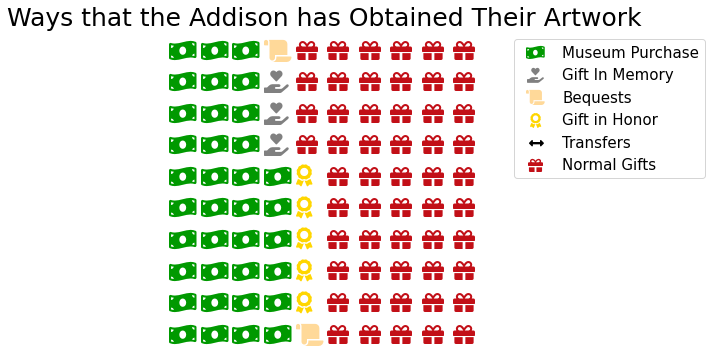

In [8]:
ig = plt.figure(FigureClass=Waffle,
                 figsize=(10,5),
                 values=dict_credit,
                 rows=10,
                 colors=list(colors.values()),
                 icons=['money-bill-wave','hand-holding-heart', 'scroll', 'award', 'arrows-alt-h', 'gift'],
                 font_size=22,
                 icon_legend=True,
                 legend={'bbox_to_anchor': (1.75, 1), 'fontsize': 15, 'frameon': True})
plt.title('Ways that the Addison has Obtained Their Artwork', fontsize=25)
plt.show()

We come to find that most of the Museum's artwork comes from normal gifts, followed shortly by museum purchases, taking up a total of 90% of the artworks combined.

It's also interesting to note that of the methods here, transfers take up less than 1% of all ways.

Diving further, let's now look at the individuals who have donated to the museum and how much exactly they have donated.

For all the gifts in honor and memory, who donates them and who has donated the most?

In [9]:
names = []
dict = {}

for obj in Donors:
    if 'partial' in obj:
        donor = ' '.join(obj.split(' ',3)[3:])
    elif obj.split()[0] != 'gift':
        donor = obj
    else:
        donor = ' '.join(obj.split(' ',2)[2:])
    names.append(donor)
    
def uniqueWord(Word):
    if Word in dict:
        dict[words] += 1
    else:
        dict.update({words: 1})
        
for words in names:
    uniqueWord(words)

giftSum = 0    

for x in dict:
    giftSum += dict[x]
    
print(giftSum)
print(MGcount + Hcount + Gcount)
otherGifts = MGcount + Hcount + Gcount - giftSum

print(otherGifts)

# for i in dict:
#     if dict[i] >= 100:
#         print(i,dict[i])

11023
11085
62


In [10]:
bigDonor = {}
for i in dict:
    if dict[i] >= 100:
        bigDonor.update({i : dict[i]})

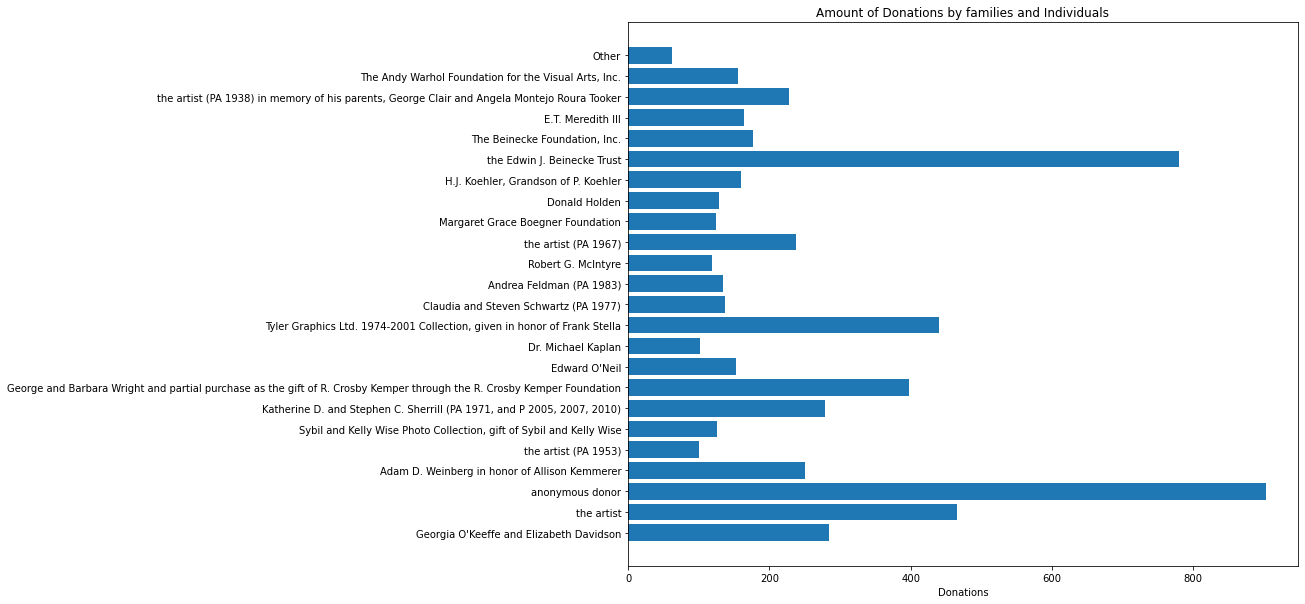

In [11]:
donorNames = list(bigDonor.keys())
donorVals = list(bigDonor.values())
donorNames.append('Other')
donorVals.append(otherGifts)

objects = tuple(donorNames)
y_vals = np.arange(len(objects))

fig = figure(figsize = (12, 10))

plt.barh(y_vals, donorVals, align = 'center')
plt.yticks(y_vals, objects)
plt.xlabel('Donations')
plt.title('Amount of Donations by families and Individuals')
plt.show()

As one would expect. anonymous donors account for the most amount of artwork donations, as well as organizations such as trusts and foundations. An interesting thing to note is also that the Edwin J. Beinecke Trust has donated the second most here. More interesting, is this unknown person named "the artist". While he has donated the most as a single individual, he remains completely anonymous. 

Now, we're curious to see who exactly has been donated in honor or in memory of.

In [12]:
Mem_names = []
Memory_of = {}
word_in = 0
word_in2 = 0

for obj in Donors:
    Person = ''
    
    if 'honor of' in obj:
        word_in = obj.index('honor')
        Person = obj[word_in + 9:]
        first_word = Person.split()[0]
        
        if first_word == 'his' or first_word == 'His' or first_word == 'her' or first_word == 'Her':
            word_in2 = Person.index(first_word)
            Person = Person[word_in2 + 4:]
            
        elif first_word == 'their' or first_word == 'Their':
            word_in2 = Person.index(first_word)
            Person = Person[word_in2 + 6:]
    
    elif 'Honor of' in obj: 
        word_in = obj.index('Honor')
        Person = obj[word_in + 9:]
        first_word = Person.split()[0]
        
        if first_word == 'his' or first_word == 'His' or first_word == 'her' or first_word == 'Her':
            word_in2 = Person.index(first_word)
            Person = Person[word_in2 + 4:]
            
        elif first_word == 'their' or first_word == 'Their':
            word_in2 = Person.index(first_word)
            Person = Person[word_in2 + 6:]
    
    elif 'memory of' in obj: 
        word_in = obj.index('memory')
        Person = obj[word_in + 10:]
        first_word = Person.split()[0]
        
        if first_word == 'his' or first_word == 'His' or first_word == 'her' or first_word == 'Her':
            word_in2 = Person.index(first_word)
            Person = Person[word_in2 + 4:]
            
        elif first_word == 'their' or first_word == 'Their':
            word_in2 = Person.index(first_word)
            Person = Person[word_in2 + 6:]
               
    elif 'Memory of' in obj: 
        word_in = obj.index('Memory')
        Person = obj[word_in + 10:]
        first_word = Person.split()[0]
        
        if first_word == 'his' or first_word == 'His' or first_word == 'her' or first_word == 'Her':
            word_in2 = Person.index(first_word)
            Person = Person[word_in2 + 4:]
            
        elif first_word == 'their' or first_word == 'Their':
            word_in2 = Person.index(first_word)
            Person = Person[word_in2 + 6:]
    
    if Person != '':
        Mem_names.append(Person)
        
for word in Mem_names:
    if word in Memory_of:
        Memory_of[word] += 1
    else:
        Memory_of.update({word: 1})

# for obj in Memory_of:
#     print(obj,Memory_of[obj])

For the sake of making sure our graph doesn't become overly complicated, we will only list names that have more than 50 donations made in their memory/honor.

In [13]:
mostMemories = {}
memories = 0
mostMemoriesCount = 0
for i in Memory_of:
    if Memory_of[i] > 50:
        mostMemories.update({i: Memory_of[i]})
        mostMemoriesCount += Memory_of[i]
    memories += Memory_of[i]

otherMemories = memories - mostMemoriesCount

print(mostMemories)

{'Beth Lisa Feldman': 145, 'Allison Kemmerer': 256, 'Adam Weinberg': 56, 'Frank Stella': 440, 'parents, George Clair and Angela Montejo Roura Tooker': 227, 'Donald and Britta McNemar': 51}


In [14]:
rememberedNames = list(mostMemories.keys())
rememberedVals = list(mostMemories.values())
rememberedNames.append('Others')
rememberedVals.append(otherMemories)

print(rememberedNames)
print(rememberedVals)

['Beth Lisa Feldman', 'Allison Kemmerer', 'Adam Weinberg', 'Frank Stella', 'parents, George Clair and Angela Montejo Roura Tooker', 'Donald and Britta McNemar', 'Others']
[145, 256, 56, 440, 227, 51, 297]


<function matplotlib.pyplot.show(close=None, block=None)>

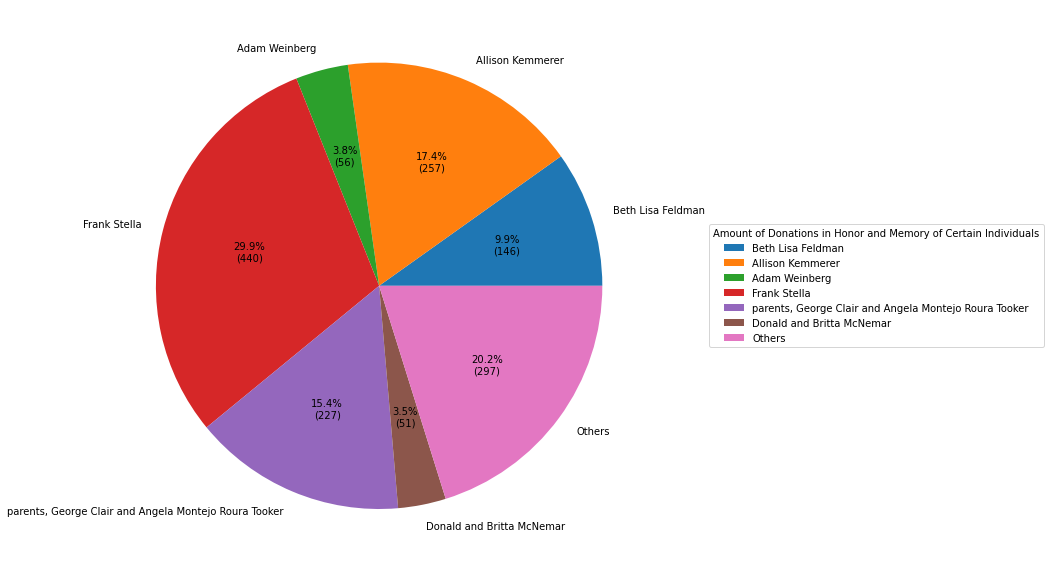

In [15]:
objects = tuple(rememberedNames)
y_vals = np.arange(len(objects))

fig, ax = plt.subplots(figsize = (10, 12))

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues)) + 1
    return "{:.1f}%\n({:d})".format(pct, absolute)

ax.pie(rememberedVals, autopct = lambda pct: func(pct, rememberedVals), labels = rememberedNames)

ax.legend(title = 'Amount of Donations in Honor and Memory of Certain Individuals',
          loc = 'center right', bbox_to_anchor = (1.2, 0, .5, 1))

plt.show

We come to find that Frank Stella has had much to be donated in his honor or memory, taking up nearly 30% of the entire donations made in someone's honor/memory. He is the only person to have more donations in his honor than the collective of other donations. However, George Clair and Angela Montejo Roura Took are not far behind.

# Conclusion

We come to find that ordinary gifts and museum purchases are the most popular ways for the Addison to obtain their artwork. Moreover, a decent amount of the donations made in people's honor and memory seem to come from ananymous donors, trusts, foundations, and more particular, the artist. He as an individual has made a lot of donations to the Addison. While there aren't many names that have over 50 artworks gifted in their honor/memory, the 297 other donations show that a lot of artowkr has been donated in memory/honor of a lot of people to the Addison.